## STOCK PRICE PREDICTION - TCS


In [7]:
# importing the required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt

## Data Collection

In [8]:
# Stock Dataset of Tata's TCS traded at National Stock Exchange - NSE, Mumbai
df = pd.read_csv('C:/Users/Dilip jain/Downloads/TCS.csv')   

In [9]:
# displaying the first few rows of the dataframe
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


## Data Exploratory Analysis


In [10]:
# displaying the number of missing values in each column of the dataframe
df.isnull().sum()  

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [11]:
# viewing statistical data like percentile, mean, standard deviation, etc. 
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,2456.000000,4.139000e+03,4139.000000
mean,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,85502.709283,8.952206e+05,0.549429
std,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,56031.488595,8.637908e+05,0.132867
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,1219.000000,7.765000e+03,0.121400
25%,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,46749.500000,4.334740e+05,0.459100
50%,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,68901.000000,7.052640e+05,0.553800
75%,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,110630.250000,1.136132e+06,0.646850
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,542541.000000,3.155626e+07,0.962200


## Data Pre-Processing

In [12]:
# updating the dataset by taking only the 'closing price of the day' Column 
df_close = df['Close']
# displaying the dataset 
print(df_close)

0        987.95
1        979.00
2        962.65
3        986.75
4        988.10
         ...   
4134    3100.80
4135    3132.00
4136    3124.10
4137    3115.25
4138    3035.65
Name: Close, Length: 4139, dtype: float64


In [13]:
# viewing the dimensionality of the dataframe 
df_close.shape

(4139,)

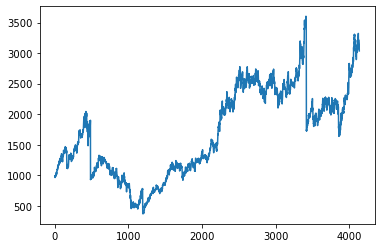

In [14]:
# to see the visualizations in the notebook itself
%matplotlib inline
# creating a 2-D plot graph of the closing TCS stock prices
plt.plot(df_close)

## Data Normalization

In [18]:
# transforming the data values since the LSTM is sensitive to the scale of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [19]:
# dataset has been converted to a numpy array with values between 0 and 1
print(df_close)   # printing the dataset

[[0.19193401]
 [0.18916915]
 [0.18411826]
 ...
 [0.85184041]
 [0.84910644]
 [0.82451615]]


## Dataset Split


In [20]:
# setting the training and test size
train_size = int(len(df_close) * 0.75)
test_size = len(df_close) - train_size
# splitting the dataset into train data and test data
train_data, test_data = df_close[:train_size, :], df_close[train_size:len(df_close), :]

In [21]:
# displaying the lengths of training size and test size
train_size, test_size

(3104, 1035)

In [22]:
# displaying the training data
print(train_data)

[[0.19193401]
 [0.18916915]
 [0.18411826]
 ...
 [0.63058958]
 [0.65972104]
 [0.64833722]]


In [23]:
# displaying the test data
print(test_data)

[[0.6317017 ]
 [0.65341901]
 [0.65590584]
 ...
 [0.85184041]
 [0.84910644]
 [0.82451615]]


## Hyperparameter Tuning

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    # creating 100 records in dataX, dataY
    for i in range(len(dataset) - time_step - 1):
        # iterations
        a = dataset[i:(i + time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    # return the values
    return np.array(dataX), np.array(dataY)

In [25]:
# learning of the model depends on the 'time_step' hyperparameter
time_step = 100
# creating feature and target variables
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [26]:
# printing the dimensionalities of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (3003, 100)
Shape of y_train: (3003,)


In [27]:
# printing the dimensionalities of X_test and y_test
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (934, 100)
Shape of y_test: (934,)


In [28]:
# reshape input in 3-D as [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Stacked Long Short-Term Memory (LSTM) Model Creation


In [29]:
# Stacked LSTM
model = Sequential()
# for plain stack of layers
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
# final output
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [30]:
# brief representation
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [32]:
# training the model for a fixed number of epochs (iterations on a dataset)
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size = 64, verbose = 1)

Epoch 1/100
47/47 [==============================] - 58s 321ms/step - loss: 0.0333 - val_loss: 0.0040
Epoch 2/100
47/47 [==============================] - 10s 212ms/step - loss: 7.9753e-04 - val_loss: 0.0038
Epoch 3/100
47/47 [==============================] - 9s 202ms/step - loss: 6.1313e-04 - val_loss: 0.0041
Epoch 4/100
47/47 [==============================] - 11s 237ms/step - loss: 6.5062e-04 - val_loss: 0.0037
Epoch 5/100
47/47 [==============================] - 11s 238ms/step - loss: 6.7209e-04 - val_loss: 0.0035
Epoch 6/100
47/47 [==============================] - 10s 208ms/step - loss: 6.6304e-04 - val_loss: 0.0033
Epoch 7/100
47/47 [==============================] - 11s 245ms/step - loss: 6.7207e-04 - val_loss: 0.0032
Epoch 8/100
47/47 [==============================] - 10s 224ms/step - loss: 6.1946e-04 - val_loss: 0.0033
Epoch 9/100
47/47 [==============================] - 9s 200ms/step - loss: 7.1930e-04 - val_loss: 0.0029
Epoch 10/100
47/47 [==============================] 

47/47 [==============================] - 9s 194ms/step - loss: 1.1480e-04 - val_loss: 5.5853e-04
Epoch 77/100
47/47 [==============================] - 9s 196ms/step - loss: 1.3306e-04 - val_loss: 5.5713e-04
Epoch 78/100
47/47 [==============================] - 9s 191ms/step - loss: 1.0906e-04 - val_loss: 7.2475e-04
Epoch 79/100
47/47 [==============================] - 9s 202ms/step - loss: 2.1435e-04 - val_loss: 5.3602e-04
Epoch 80/100
47/47 [==============================] - 9s 189ms/step - loss: 1.1417e-04 - val_loss: 5.4362e-04
Epoch 81/100
47/47 [==============================] - 9s 201ms/step - loss: 1.1544e-04 - val_loss: 5.3159e-04
Epoch 82/100
47/47 [==============================] - 9s 195ms/step - loss: 1.0357e-04 - val_loss: 5.2273e-04
Epoch 83/100
47/47 [==============================] - 9s 199ms/step - loss: 1.0993e-04 - val_loss: 6.3759e-04
Epoch 84/100
47/47 [==============================] - 11s 231ms/step - loss: 1.0765e-04 - val_loss: 5.2783e-04
Epoch 85/100
47/47 [==

## Performance Check

In [33]:
# doing prediction and checking performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [34]:
# transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Root Mean Squared Error


In [35]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
# train data RMSE
math.sqrt(mean_squared_error(y_train, train_predict))

0.01077861045009059

In [37]:
# test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

0.022914120944779206

## Prediction on Test Data

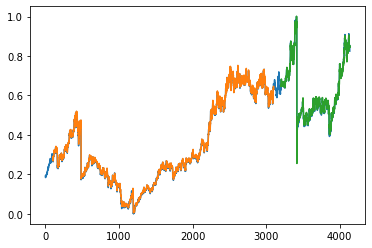

In [38]:
# Plotting 
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) +1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
# green colored line shows the prediction on test data
plt.show()

## Data Analysis for Future Forecasting

In [39]:
# checking the length of the test data
len(test_data)

1035

In [40]:
# reshaping the stock price records of previous 100 days
x_input = test_data[935:].reshape(1,-1)
# displaying the dimensionality of x_input
x_input.shape

(1, 100)

In [41]:
# converting x_input into a list
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [42]:
# viewing the temp_input 
print(temp_input)

[0.7237453854589828, 0.7293368962481273, 0.7324724672155203, 0.7508842927974546, 0.7550547566457115, 0.7468682905732071, 0.7466520442995939, 0.751007862096662, 0.7398402866807743, 0.7561050956889761, 0.7635192536414328, 0.7705627036962668, 0.7579431890146895, 0.7741153210484855, 0.7853137887891755, 0.7854991427379867, 0.7916930538607683, 0.7920328694335892, 0.7854836965755858, 0.7711033193803001, 0.7913377921255464, 0.8256900573052626, 0.8422328972366817, 0.8294125824438918, 0.8236357177059361, 0.8508518558564127, 0.8680125422838696, 0.8675182650870392, 0.8626063854435366, 0.8909500934492827, 0.8855902750961524, 0.8820067654191317, 0.894039325929473, 0.9088985341591884, 0.8981016666409232, 0.9071376716454798, 0.9034923773188552, 0.8941474490662797, 0.8742218995690523, 0.8479016388378309, 0.8565514897823636, 0.8763534699803834, 0.8753031309371189, 0.8717196212600979, 0.8622974621955175, 0.8796435025717861, 0.8681515577454781, 0.8793963639733708, 0.877141224262832, 0.8724455908929427, 0.

## Future Stock Price Forecasting


In [43]:
# demonstrate prediction for next 30 days
lst_output = []
n_steps = 100
i = 0
while(i < 30):
    
    if(len(temp_input) > 100):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
    
print(lst_output)

[0.8131473]
101
1 day input [0.7293369  0.73247247 0.75088429 0.75505476 0.74686829 0.74665204
 0.75100786 0.73984029 0.7561051  0.76351925 0.7705627  0.75794319
 0.77411532 0.78531379 0.78549914 0.79169305 0.79203287 0.7854837
 0.77110332 0.79133779 0.82569006 0.8422329  0.82941258 0.82363572
 0.85085186 0.86801254 0.86751827 0.86260639 0.89095009 0.88559028
 0.88200677 0.89403933 0.90889853 0.89810167 0.90713767 0.90349238
 0.89414745 0.8742219  0.84790164 0.85655149 0.87635347 0.87530313
 0.87171962 0.86229746 0.8796435  0.86815156 0.87939636 0.87714122
 0.87244559 0.85670595 0.84711388 0.83608532 0.83121978 0.83569917
 0.80066727 0.80738635 0.79746992 0.8120511  0.78084985 0.79008665
 0.8154647  0.8317604  0.82885652 0.81598987 0.81565005 0.82924267
 0.83542114 0.83140514 0.83393831 0.84750004 0.84839592 0.82477873
 0.82901098 0.85355493 0.85755549 0.85091364 0.83353671 0.83413911
 0.86248282 0.86844503 0.86447537 0.8873048  0.89527502 0.8973448
 0.91153983 0.91305355 0.88966806 0.

9 day output [[0.8149861]]
10 day input [0.76351925 0.7705627  0.75794319 0.77411532 0.78531379 0.78549914
 0.79169305 0.79203287 0.7854837  0.77110332 0.79133779 0.82569006
 0.8422329  0.82941258 0.82363572 0.85085186 0.86801254 0.86751827
 0.86260639 0.89095009 0.88559028 0.88200677 0.89403933 0.90889853
 0.89810167 0.90713767 0.90349238 0.89414745 0.8742219  0.84790164
 0.85655149 0.87635347 0.87530313 0.87171962 0.86229746 0.8796435
 0.86815156 0.87939636 0.87714122 0.87244559 0.85670595 0.84711388
 0.83608532 0.83121978 0.83569917 0.80066727 0.80738635 0.79746992
 0.8120511  0.78084985 0.79008665 0.8154647  0.8317604  0.82885652
 0.81598987 0.81565005 0.82924267 0.83542114 0.83140514 0.83393831
 0.84750004 0.84839592 0.82477873 0.82901098 0.85355493 0.85755549
 0.85091364 0.83353671 0.83413911 0.86248282 0.86844503 0.86447537
 0.8873048  0.89527502 0.8973448  0.91153983 0.91305355 0.88966806
 0.8456465  0.88114178 0.87378941 0.86348682 0.85815789 0.85020312
 0.84733013 0.8446425  

19 day output [[0.8136032]]
20 day input [0.79133779 0.82569006 0.8422329  0.82941258 0.82363572 0.85085186
 0.86801254 0.86751827 0.86260639 0.89095009 0.88559028 0.88200677
 0.89403933 0.90889853 0.89810167 0.90713767 0.90349238 0.89414745
 0.8742219  0.84790164 0.85655149 0.87635347 0.87530313 0.87171962
 0.86229746 0.8796435  0.86815156 0.87939636 0.87714122 0.87244559
 0.85670595 0.84711388 0.83608532 0.83121978 0.83569917 0.80066727
 0.80738635 0.79746992 0.8120511  0.78084985 0.79008665 0.8154647
 0.8317604  0.82885652 0.81598987 0.81565005 0.82924267 0.83542114
 0.83140514 0.83393831 0.84750004 0.84839592 0.82477873 0.82901098
 0.85355493 0.85755549 0.85091364 0.83353671 0.83413911 0.86248282
 0.86844503 0.86447537 0.8873048  0.89527502 0.8973448  0.91153983
 0.91305355 0.88966806 0.8456465  0.88114178 0.87378941 0.86348682
 0.85815789 0.85020312 0.84733013 0.8446425  0.8542809  0.85184041
 0.84910644 0.82451615 0.81314731 0.81186348 0.81434846 0.81639171
 0.81698352 0.81658036

28 day output [[0.80422676]]
29 day input [0.89095009 0.88559028 0.88200677 0.89403933 0.90889853 0.89810167
 0.90713767 0.90349238 0.89414745 0.8742219  0.84790164 0.85655149
 0.87635347 0.87530313 0.87171962 0.86229746 0.8796435  0.86815156
 0.87939636 0.87714122 0.87244559 0.85670595 0.84711388 0.83608532
 0.83121978 0.83569917 0.80066727 0.80738635 0.79746992 0.8120511
 0.78084985 0.79008665 0.8154647  0.8317604  0.82885652 0.81598987
 0.81565005 0.82924267 0.83542114 0.83140514 0.83393831 0.84750004
 0.84839592 0.82477873 0.82901098 0.85355493 0.85755549 0.85091364
 0.83353671 0.83413911 0.86248282 0.86844503 0.86447537 0.8873048
 0.89527502 0.8973448  0.91153983 0.91305355 0.88966806 0.8456465
 0.88114178 0.87378941 0.86348682 0.85815789 0.85020312 0.84733013
 0.8446425  0.8542809  0.85184041 0.84910644 0.82451615 0.81314731
 0.81186348 0.81434846 0.81639171 0.81698352 0.81658036 0.81586063
 0.81527561 0.81499213 0.81498611 0.81515342 0.81538141 0.81558156
 0.81569701 0.81569397 

## Future Stock Price - Graph Plot

In [44]:
# creating an instance of ndarray with evenly spaced values
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [45]:
# checking the length of our original dataframe
print(len(df_close))

4139


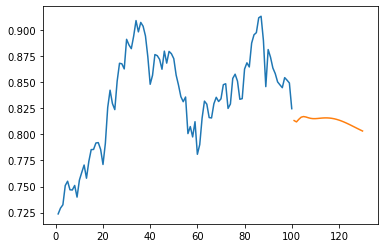

In [46]:
# plotting the future stock prices on a 2-D graph
plt.plot(day_new, scaler.inverse_transform(df_close[4039:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

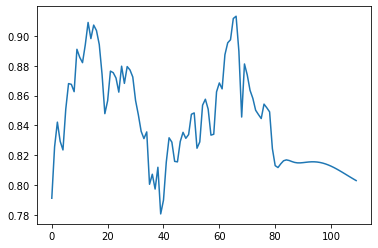

In [49]:
# plotting the complete stock price output
dataset_close = df_close.tolist()
dataset_close.extend(lst_output)
plt.plot(dataset_close[4059:])

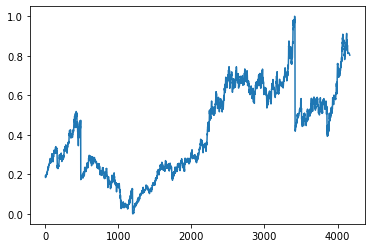

In [51]:
# plotting the complete stock price output
dataset_close = scaler.inverse_transform(dataset_close).tolist()
plt.plot(dataset_close)

## Evaluation Metrics

In [54]:
# calculating performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# decide on a cutoff limit
cutoff = 0.7  
# initialise a matrix full with zeroes
train_predict_classes = np.zeros_like(train_predict) 
# add a 1 if the cutoff was breached
train_predict_classes[train_predict > cutoff] = 1 
# for the actual values
y_train_classes = np.zeros_like(y_train)
y_train_classes[y_train > cutoff] = 1
# train data
print("Accuracy Score of Train Data:", accuracy_score(y_train_classes, train_predict_classes))
print("Precision Score of Train Data:", precision_score(y_train_classes, train_predict_classes))
print("Recall Score of Train Data:", recall_score(y_train_classes, train_predict_classes))

Accuracy Score of Train Data: 0.9886779886779887
Precision Score of Train Data: 0.782051282051282
Recall Score of Train Data: 0.782051282051282


In [55]:
# initialise a matrix full with zeroes
test_predict_classes = np.zeros_like(test_predict) 
# add a 1 if the cutoff was breached
test_predict_classes[test_predict > cutoff] = 1 
# for the actual values
y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > cutoff] = 1
# test data
print("Accuracy Score of Test Data:", accuracy_score(y_test_classes, test_predict_classes))
print("Precision Score of Test Data:", precision_score(y_test_classes, test_predict_classes))
print("Recall Score of Test Data:", recall_score(y_test_classes, test_predict_classes))

Accuracy Score of Test Data: 0.9796573875802997
Precision Score of Test Data: 0.9586466165413534
Recall Score of Test Data: 0.9695817490494296


---------------------------------------------------------------------------------------

## STOCK PRICE PREDICTION - INFOSYS

In [58]:
# Stock Dataset of Infosys traded at National Stock Exchange - NSE, Mumbai
df = pd.read_csv('C:/Users/Dilip jain/Downloads/INFY.csv') 

In [59]:
# displaying the first few rows of the dataframe
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


## Data Exploratory Analysis


In [60]:
# displaying the number of missing values in each column of the dataframe
df.isnull().sum()  

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [61]:
# viewing statistical data like percentile, mean, standard deviation, etc. 
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.797000e+03,4797.000000
mean,2584.356643,2584.665266,2626.204297,2539.065002,2581.678345,2581.885215,2582.749548,2.622813e+06,3.855758e+14,1.118490e+05,1.574596e+06,0.536366
std,1796.807396,1796.731660,1842.170527,1743.052412,1789.259360,1789.462674,1792.981289,4.202984e+06,3.808224e+14,9.020307e+04,2.269940e+06,0.179496
min,526.450000,509.250000,558.000000,509.250000,529.150000,526.450000,531.330000,3.291000e+03,2.933192e+12,1.350000e+03,4.352000e+03,0.045800
25%,1216.062500,1213.675000,1233.675000,1197.925000,1215.750000,1216.062500,1214.647500,7.166842e+05,2.065910e+14,5.922600e+04,4.074360e+05,0.455700
50%,2265.675000,2265.000000,2294.300000,2232.475000,2263.275000,2265.575000,2262.210000,1.210798e+06,2.911119e+14,9.025650e+04,8.011600e+05,0.579900
75%,3170.562500,3174.762500,3210.037500,3124.575000,3170.750000,3169.350000,3168.457500,2.784006e+06,4.335687e+14,1.354770e+05,1.986846e+06,0.663700
max,16855.900000,16800.000000,16875.250000,16253.000000,16875.250000,16855.900000,16646.380000,9.043339e+07,8.323905e+15,1.643015e+06,5.775916e+07,0.996000


## Data Pre-Processing

In [62]:
# updating the dataset by taking only the 'closing price of the day' Column 
df_close = df['Close']
# displaying the dataset 
print(df_close)

0       15625.20
1       16855.90
2       15507.45
3       14266.85
4       13125.50
          ...   
5301     1343.55
5302     1348.50
5303     1356.00
5304     1356.35
5305     1354.35
Name: Close, Length: 5306, dtype: float64


In [63]:
# viewing the dimensionality of the dataframe 
df_close.shape

(5306,)

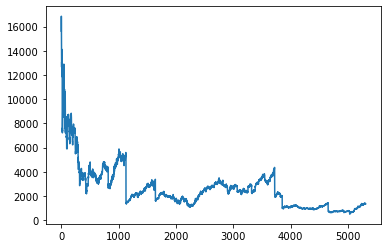

In [64]:
# to see the visualizations in the notebook itself
%matplotlib inline
# creating a 2-D plot graph of the closing TCS stock prices
plt.plot(df_close)

## Data Normalization

In [65]:
# transforming the data values since the LSTM is sensitive to the scale of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [66]:
# dataset has been converted to a numpy array with values between 0 and 1
print(df_close)   # printing the dataset

[[0.9246331 ]
 [1.        ]
 [0.9174222 ]
 ...
 [0.05080085]
 [0.05082229]
 [0.05069981]]


## Dataset Split


In [67]:
# setting the training and test size
train_size = int(len(df_close) * 0.75)
test_size = len(df_close) - train_size
# splitting the dataset into train data and test data
train_data, test_data = df_close[:train_size, :], df_close[train_size:len(df_close), :]

In [68]:
# displaying the lengths of training size and test size
train_size, test_size

(3979, 1327)

In [69]:
# displaying the training data
print(train_data)

[[0.9246331 ]
 [1.        ]
 [0.9174222 ]
 ...
 [0.03374884]
 [0.03486951]
 [0.03555845]]


In [70]:
# displaying the test data
print(test_data)

[[0.03409178]
 [0.03533493]
 [0.03412852]
 ...
 [0.05080085]
 [0.05082229]
 [0.05069981]]


## Hyperparameter Tuning

In [71]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    # creating 100 records in dataX, dataY
    for i in range(len(dataset) - time_step - 1):
        # iterations
        a = dataset[i:(i + time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    # return the values
    return np.array(dataX), np.array(dataY)

In [72]:
# learning of the model depends on the 'time_step' hyperparameter
time_step = 100
# creating feature and target variables
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [73]:
# printing the dimensionalities of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (3878, 100)
Shape of y_train: (3878,)


In [74]:
# printing the dimensionalities of X_test and y_test
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (1226, 100)
Shape of y_test: (1226,)


In [75]:
# reshape input in 3-D as [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Stacked Long Short-Term Memory (LSTM) Model Creation


In [76]:
# Stacked LSTM
model = Sequential()
# for plain stack of layers
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
# final output
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [77]:
# brief representation
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
# training the model for a fixed number of epochs (iterations on a dataset)
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size = 64, verbose = 1)

Epoch 1/100
61/61 [==============================] - 40s 248ms/step - loss: 0.0074 - val_loss: 7.5771e-05
Epoch 2/100
61/61 [==============================] - 12s 197ms/step - loss: 4.1513e-04 - val_loss: 1.3726e-04
Epoch 3/100
61/61 [==============================] - 12s 197ms/step - loss: 3.0466e-04 - val_loss: 2.1629e-05
Epoch 4/100
61/61 [==============================] - 12s 198ms/step - loss: 3.2681e-04 - val_loss: 7.8797e-05
Epoch 5/100
61/61 [==============================] - 11s 189ms/step - loss: 2.7049e-04 - val_loss: 1.7527e-05
Epoch 6/100
61/61 [==============================] - 12s 194ms/step - loss: 2.5977e-04 - val_loss: 2.0229e-05
Epoch 7/100
61/61 [==============================] - 12s 198ms/step - loss: 2.9928e-04 - val_loss: 7.4589e-05
Epoch 8/100
61/61 [==============================] - 12s 195ms/step - loss: 2.2395e-04 - val_loss: 9.9705e-06
Epoch 9/100
61/61 [==============================] - 11s 188ms/step - loss: 2.4081e-04 - val_loss: 2.3674e-05
Epoch 10/100
6

61/61 [==============================] - 13s 206ms/step - loss: 5.5543e-05 - val_loss: 3.2636e-06
Epoch 75/100
61/61 [==============================] - 12s 203ms/step - loss: 7.4117e-05 - val_loss: 3.0256e-06
Epoch 76/100
61/61 [==============================] - 13s 210ms/step - loss: 4.0378e-05 - val_loss: 2.1883e-05TA: 6 - ETA: 2s - loss: 3.8597 - ETA: 2s - loss
Epoch 77/100
61/61 [==============================] - 13s 210ms/step - loss: 6.6415e-05 - val_loss: 8.0368e-06
Epoch 78/100
61/61 [==============================] - 13s 217ms/step - loss: 4.4047e-05 - val_loss: 1.4152e-05
Epoch 79/100
61/61 [==============================] - 13s 210ms/step - loss: 7.4295e-05 - val_loss: 5.3644e-06
Epoch 80/100
61/61 [==============================] - 12s 205ms/step - loss: 7.9412e-05 - val_loss: 3.1686e-06
Epoch 81/100
61/61 [==============================] - 12s 201ms/step - loss: 5.5437e-05 - val_loss: 2.9308e-06
Epoch 82/100
61/61 [==============================] - 14s 223ms/step - loss: 8

## Performance Check

In [79]:
# doing prediction and checking performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [80]:
# transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Root Mean Squared Error


## Prediction on Test Data

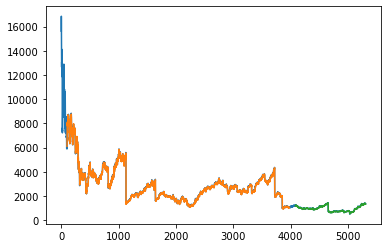

In [84]:
# Plotting 
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) +1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
# green colored line shows the prediction on test data
plt.show()

## Data Analysis for Future Forecasting

In [85]:
# checking the length of the test data
len(test_data)

1327

In [86]:
# reshaping the stock price records of previous 100 days
x_input = test_data[1227:].reshape(1,-1)
# displaying the dimensionality of x_input
x_input.shape

(1, 100)

In [87]:
# converting x_input into a list
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [88]:
# viewing the temp_input 
print(temp_input)

[0.03674342981545611, 0.037245590022934025, 0.03778755561271199, 0.038390760252182396, 0.039728833487961926, 0.03927260256775335, 0.03899396489165281, 0.03907663760873757, 0.03846730906429793, 0.039147062515883874, 0.0387490086928831, 0.04062292361347136, 0.03985743549231602, 0.04250296243902886, 0.04449629350651736, 0.0434552296617461, 0.043715495622938916, 0.044327886119863186, 0.04411354944593969, 0.044664700893171524, 0.04494946247424132, 0.04665190805569078, 0.04699178478148375, 0.046275287900082354, 0.045053568858718446, 0.048112459390855164, 0.05203788247613973, 0.05176536870500843, 0.052708450070271806, 0.051688819892892895, 0.050124162173251385, 0.048109397438370546, 0.04839109706695571, 0.04978734739994305, 0.04980265716236615, 0.04987308206951244, 0.04890856703685671, 0.047432705939269224, 0.04591397750689705, 0.04363894681082338, 0.04497702004660291, 0.04561084421091953, 0.046431447476798046, 0.04610688051342818, 0.045662897403158084, 0.047588865515984916, 0.047711343615369

## Future Stock Price Forecasting


In [89]:
# demonstrate prediction for next 30 days
lst_output = []
n_steps = 100
i = 0
while(i < 30):
    
    if(len(temp_input) > 100):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
    
print(lst_output)

[0.04988291]
101
1 day input [0.03724559 0.03778756 0.03839076 0.03972883 0.0392726  0.03899396
 0.03907664 0.03846731 0.03914706 0.03874901 0.04062292 0.03985744
 0.04250296 0.04449629 0.04345523 0.0437155  0.04432789 0.04411355
 0.0446647  0.04494946 0.04665191 0.04699178 0.04627529 0.04505357
 0.04811246 0.05203788 0.05176537 0.05270845 0.05168882 0.05012416
 0.0481094  0.0483911  0.04978735 0.04980266 0.04987308 0.04890857
 0.04743271 0.04591398 0.04363895 0.04497702 0.04561084 0.04643145
 0.04610688 0.0456629  0.04758887 0.04771134 0.04715713 0.04692136
 0.04797161 0.04796242 0.04678357 0.0462263  0.04690911 0.04683869
 0.04524035 0.04531077 0.04579762 0.04581293 0.0445116  0.04535058
 0.04764704 0.05003843 0.04923007 0.04839416 0.04956076 0.05016091
 0.05154491 0.05195521 0.05187866 0.05251555 0.05269926 0.04964344
 0.05009354 0.05170719 0.05175312 0.05066307 0.04944135 0.04958832
 0.05259516 0.05153878 0.05258903 0.05410164 0.05417206 0.05534479
 0.05593575 0.05600923 0.05507228

9 day output [[0.04406295]]
10 day input [0.03874901 0.04062292 0.03985744 0.04250296 0.04449629 0.04345523
 0.0437155  0.04432789 0.04411355 0.0446647  0.04494946 0.04665191
 0.04699178 0.04627529 0.04505357 0.04811246 0.05203788 0.05176537
 0.05270845 0.05168882 0.05012416 0.0481094  0.0483911  0.04978735
 0.04980266 0.04987308 0.04890857 0.04743271 0.04591398 0.04363895
 0.04497702 0.04561084 0.04643145 0.04610688 0.0456629  0.04758887
 0.04771134 0.04715713 0.04692136 0.04797161 0.04796242 0.04678357
 0.0462263  0.04690911 0.04683869 0.04524035 0.04531077 0.04579762
 0.04581293 0.0445116  0.04535058 0.04764704 0.05003843 0.04923007
 0.04839416 0.04956076 0.05016091 0.05154491 0.05195521 0.05187866
 0.05251555 0.05269926 0.04964344 0.05009354 0.05170719 0.05175312
 0.05066307 0.04944135 0.04958832 0.05259516 0.05153878 0.05258903
 0.05410164 0.05417206 0.05534479 0.05593575 0.05600923 0.05507228
 0.05332084 0.05109174 0.05066307 0.05120197 0.05051609 0.05050078
 0.04944135 0.0500384

17 day output [[0.03900186]]
18 day input [0.04411355 0.0446647  0.04494946 0.04665191 0.04699178 0.04627529
 0.04505357 0.04811246 0.05203788 0.05176537 0.05270845 0.05168882
 0.05012416 0.0481094  0.0483911  0.04978735 0.04980266 0.04987308
 0.04890857 0.04743271 0.04591398 0.04363895 0.04497702 0.04561084
 0.04643145 0.04610688 0.0456629  0.04758887 0.04771134 0.04715713
 0.04692136 0.04797161 0.04796242 0.04678357 0.0462263  0.04690911
 0.04683869 0.04524035 0.04531077 0.04579762 0.04581293 0.0445116
 0.04535058 0.04764704 0.05003843 0.04923007 0.04839416 0.04956076
 0.05016091 0.05154491 0.05195521 0.05187866 0.05251555 0.05269926
 0.04964344 0.05009354 0.05170719 0.05175312 0.05066307 0.04944135
 0.04958832 0.05259516 0.05153878 0.05258903 0.05410164 0.05417206
 0.05534479 0.05593575 0.05600923 0.05507228 0.05332084 0.05109174
 0.05066307 0.05120197 0.05051609 0.05050078 0.04944135 0.05003843
 0.05034156 0.05080085 0.05082229 0.05069981 0.04988291 0.04926668
 0.04862675 0.0479823

25 day output [[0.03412489]]
26 day input [0.05203788 0.05176537 0.05270845 0.05168882 0.05012416 0.0481094
 0.0483911  0.04978735 0.04980266 0.04987308 0.04890857 0.04743271
 0.04591398 0.04363895 0.04497702 0.04561084 0.04643145 0.04610688
 0.0456629  0.04758887 0.04771134 0.04715713 0.04692136 0.04797161
 0.04796242 0.04678357 0.0462263  0.04690911 0.04683869 0.04524035
 0.04531077 0.04579762 0.04581293 0.0445116  0.04535058 0.04764704
 0.05003843 0.04923007 0.04839416 0.04956076 0.05016091 0.05154491
 0.05195521 0.05187866 0.05251555 0.05269926 0.04964344 0.05009354
 0.05170719 0.05175312 0.05066307 0.04944135 0.04958832 0.05259516
 0.05153878 0.05258903 0.05410164 0.05417206 0.05534479 0.05593575
 0.05600923 0.05507228 0.05332084 0.05109174 0.05066307 0.05120197
 0.05051609 0.05050078 0.04944135 0.05003843 0.05034156 0.05080085
 0.05082229 0.05069981 0.04988291 0.04926668 0.04862675 0.0479823
 0.04733186 0.04667693 0.04602031 0.04536468 0.04471189 0.04406295
 0.04341818 0.0427775 

## Future Stock Price - Graph Plot

In [90]:
# creating an instance of ndarray with evenly spaced values
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [91]:
# checking the length of our original dataframe
print(len(df_close))

5306


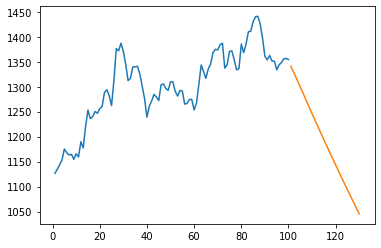

In [92]:
# plotting the future stock prices on a 2-D graph
plt.plot(day_new, scaler.inverse_transform(df_close[5206:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

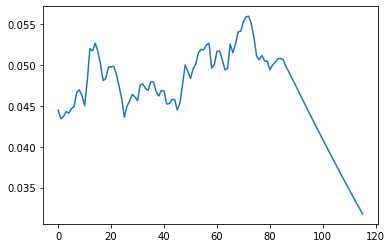

In [93]:
# plotting the complete stock price output
dataset_close = df_close.tolist()
dataset_close.extend(lst_output)
plt.plot(dataset_close[5220:])